<a href="https://colab.research.google.com/github/clunckyboy/Data-Mining-and-Preprocessing/blob/main/231401091_EdwinJonatanPurba_Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quiz 1 - Lab Data Mining**
Nama  : Edwin Jonatan Purba<br>
NIM   : 231401091 <br>
Lab   : 2 <br>
- Cari dataset, sumber data:
    - dalam data harus ada nilai null,
    - dalam data harus ada nilai duplikat,
    - minimal 1000 baris, 5 kolom

- Cleaning data, preprocessing
- Visualisasikan
- dokumentasi




link dataset : https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

# **1. Import Dependencies**

Yang pertama dilakukan adalah mengimport library yang diperlukan untuk visualisasi dan preprocessing

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Load Dataset**

Selanjutnya, mengimport dataset yang diperlukan

In [ ]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


Dapat dilihat bahwa dataset memiliki 13320 rows dan 9 columns. Selanjutnya adalah menampilkan informasi dari dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**Kolom dan tipe data**

dapat dilihat bahwa total_sqft (luas bangunan) bertipe string/objek (seharusnya bertipe float64), kolom tersebut akan diubah menjadi integer




In [ ]:
def convert_sqft_to_num(x):
    if isinstance(x, str):
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except (ValueError, TypeError):
        return float('nan')

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13274 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


Sehingga terdapat 9 kolom dengan rincian sebagai berikut:

- 5 kolom teks/kategori: area_type, availability, location, size, dan society
- 4 kolom numerik: bath, balcony, price, dan total_sqft


# **3. Data Cleaning & Preprocessing**

Untuk data cleaning, saya akan mengecek apakah ada data yang duplikat dan hilang

In [ ]:
df.duplicated().sum()

np.int64(530)

drop data duplikat, lalu cek ulang

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Selanjutnya, cek nilai yang null/kosong/hilang

In [ ]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5327
total_sqft,45
bath,73
balcony,605
price,0


dapat dilihat terdapat 6 kolom yang memiliki nilai null. Untuk kolom location, size, dan total_sqft, baris tersebut akan didrop, untuk society akan akan diisi 'NA', untuk bath dan balcony akan diisi nilai rata rata

In [ ]:
df.dropna(subset=['location', 'size', 'total_sqft'], inplace=True)
df['society'].fillna('NA', inplace=True)
df['bath'].fillna(df['bath'].mean(), inplace=True)
df['balcony'].fillna(df['balcony'].mean(), inplace=True)

<ipython-input-9-14fa6538fa5c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['society'].fillna('NA', inplace=True)
<ipython-input-9-14fa6538fa5c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [ ]:
print(df.isnull().sum())
print(df.info())

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 12728 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12728 non-null  object 
 1   availability  12728 non-null  object 
 2   location      12728 non-null  object 
 3   size          12728 non-null  object 
 4   society       12728 non-null  object 
 5   total_sqft    12728 non-null  float64
 6   bath          12728 non-null  float64
 7   balcony       12728 non-null  float64
 8   price         12728 non-null  float64
dtypes: float64(4), object(5)
memory usage: 994.4+ KB
None


dapat dilihat bahwa dataframe tidak memiliki nilai yang kosong lagi.

# **4. Visualisasi Data**



**1. Pie Chart**



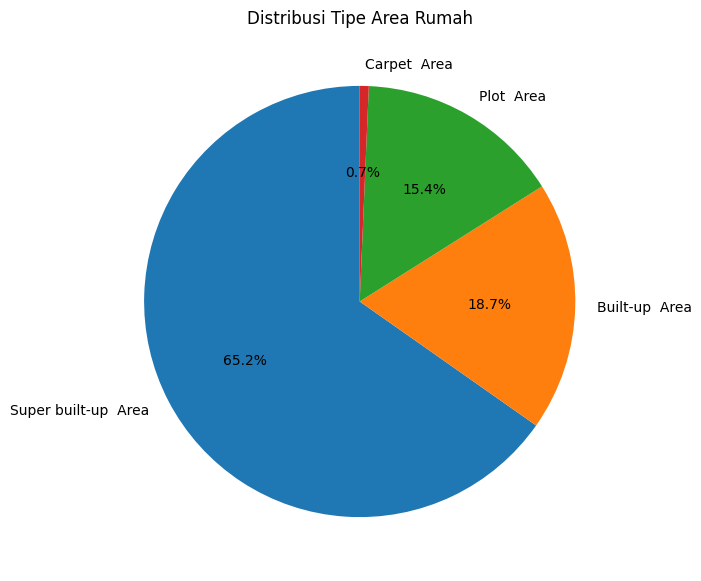

In [ ]:
distribusi_tipeArea = df['area_type'].value_counts()
plt.figure(figsize=(15,7))
distribusi_tipeArea.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Tipe Area Rumah')
plt.ylabel('')
plt.show()

Kesimpulan: frekuensi dari super built-up area mendominasi frekuensi dari tipe area rumah yaitu sebesar 65.2%, diikuti dengan built-up area sebesar 18.7%, plot area sebesar 15.4%, dan paling kecil yaitu carpet area sebesar 0.7%. Dari diagram/chart tersebut dapat diambil kesimpulan bahwa orang orang di Bengaluru cenderung untuk membeli rumah yang sudah include dengan luas bangunan dan area umum/outdoor seperti kolam renang dan sebagainya (super built-up area).

**2. Histogram**

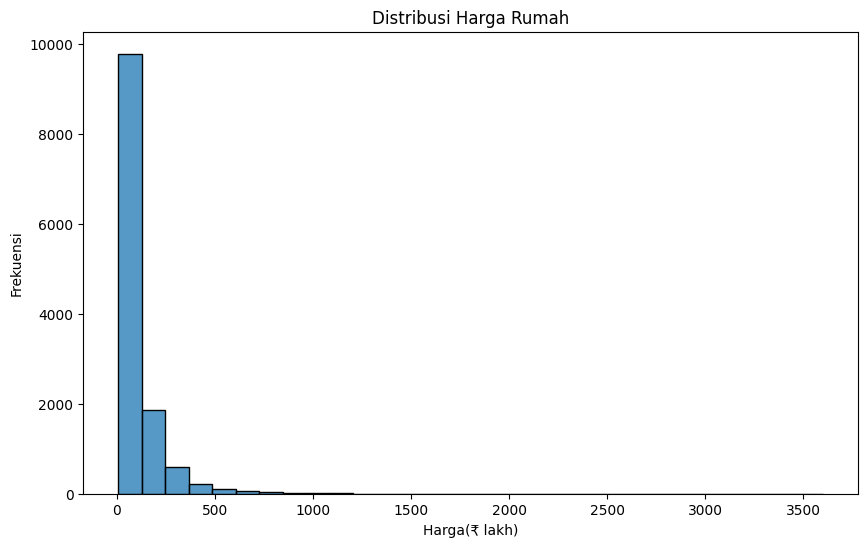

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga(₹ lakh)')
plt.ylabel('Frekuensi')
plt.show()

Pada diagram tersebut dapat dilihat bahwa frekuensi rumah yang rentang harganya dari ₹0-₹125 lakh adalah yang tertinggi yaitu sekitar 10rban rumah, di ikuti dengan ₹125-₹250 lakh dengan frekuensi yang lebih kecil yaitu sekitar 2000an rumah, dst, dan harga rumah yang paling mahal adalah berkisar di antara ₹3500 lakh. Dapat diambil kesimpulan bahwa harga rumah yang berkisar antara ₹0-₹125 lakh lebih diminati oleh orang orang di bengaluru berdasarkan beberapa faktor seperti budget dan sebagainya.

**3. Heatmap**



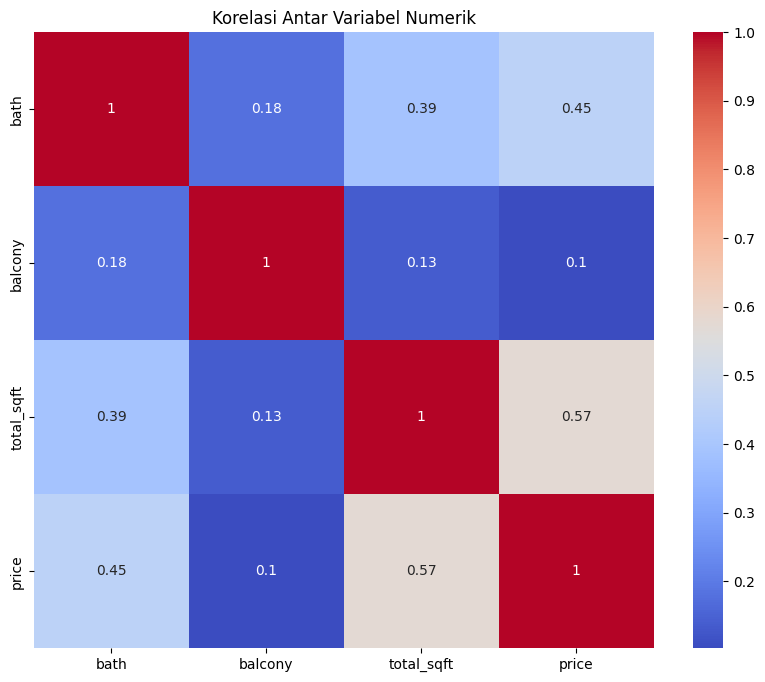

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['bath', 'balcony', 'total_sqft', 'price']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

Pada heatmap tersebut, dapat dilihat bahwa, luas area (total_sqft) adalah faktor yang paling berpengaruh ke harga rumah yaitu 0.57, diikuti dengan jumlah kamar mandi (bath) 0.45, dan jumlah balkon 0.1

**4. Scatter Plot**

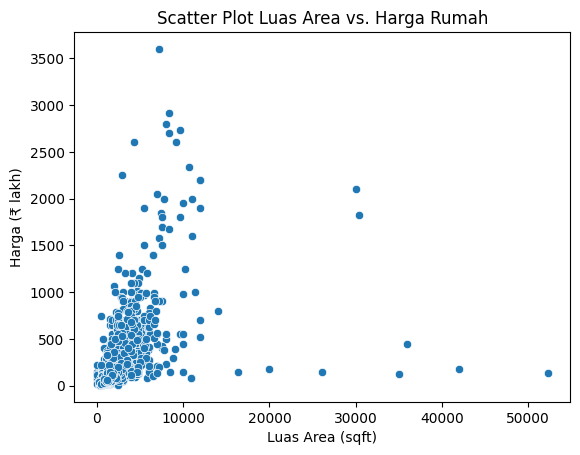

In [ ]:
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Scatter Plot Luas Area vs. Harga Rumah')
plt.xlabel('Luas Area (sqft)')
plt.ylabel('Harga (₹ lakh)')
plt.show()

Pada scatter plot di atas, dapat dilihat bahwa luas area rumah mereka, maka semakin mahal harganya. Pengecualian untuk yang luas areanya 50rb dsb karena mustahil luas area rumah dengan angkat dan harga tersebut.